# Repaso de Series de tiempo

# Imputación de valores para datos flatantes

## Caso Deserción de alumnos

1. Haciendo uso del archivo Alum_IngX_RegLin.csv:

    1.1 Reemplace los valores de 0 en los campos PRV y PRM con el valor más alto de los datos actuales.
    
    1.2 Reemplace los valores de la columna (campo) PAA con la suma de PRV y PRM
    
    1.3 Cree un nuevo archivo llamado AbandonoAnual.csv que contenga una fila por año y las siguientes columnas:
    
    + año
    + tot_alum   (total de alumnos en ese año)
    + tot_abandono (se calcula sumando la cantidad de alumnos que tengan 1 en la columna E en el año dado)
    + tot_aban_1  (total e alumnos que en un año T = 1 y E =1)
    + tot_aban_2  (total e alumnos que en un año T = 2 y E =1)
    + tot_aban_3  (total e alumnos que en un año T = 3 y E =1)
    + tot_aban_4  (total e alumnos que en un año T = 4 y E =1)
    + tot_aban_5  (total e alumnos que en un año T = 5 y E =1)
    + tot_aban_6  (total e alumnos que en un año T = 6 y E =1)
    + tot_aban_7  (total e alumnos que en un año T = 7 y E =1)
    + tot_aban_8  (total e alumnos que en un año T = 8 y E =1)
    + tot_aban_9  (total e alumnos que en un año T = 9 y E =1)
    + tot_aban_10 (total e alumnos que en un año T = 10 y E =1)
    + tot_aban_11 (total e alumnos que en un año T = 11 y E =1)
    + tot_aban_12 (total e alumnos que en un año T = 12 y E =1)
    + promedioPRV (promedio de PRV para el año en cuestión)
    + promedioPRM (promedio de PRV para el año en cuestión)
    + promedioPAA (promedio de PRV para el año en cuestión)
    + tot_PAA_1 (total de alumnos con CatPAA =1 para el año en cuestión)
    + tot_PAA_2 (total de alumnos con CatPAA =2 para el año en cuestión)
    + tot_PAA_3 (total de alumnos con CatPAA =3 para el año en cuestión)
    + tot_mujeres   (total de mujeres del año, categoría 1)
    + tot_hombres   (total de hombres del año, categoría 2)
    + promEdad      promedio de edad del año)
    + tot_Titulados (total de alumnos con TITULACION ='Titulado' para el año en cuestión)
    + tot_Pendientes (total de alumnos con TITULACION ='Pendiente' para el año en cuestión)
    + tot_Egresados (total de alumnos con ESTATUSALUMNO ='Egresado' para el año en cuestión)
    + tot_Cambio    (total de alumnos con ESTATUSALUMNO ='Cambio' para el año en cuestión)
    + tot_Bajas     (total de alumnos con ESTATUSALUMNO ='Bajas' para el año en cuestión)
    + tot_Activos   (total de alumnos con ESTATUSALUMNO ='Activos' para el año en cuestión)
    + tot_Locales   (total de alumnos con LocalForanea = 1 para el año en cuestión)
    + tot_Foraneos  (total de alumnos con LocalForane = 2 para el año en cuestión)
    + tot_Jalisco   (total de alumnos con ESTADOPREPA = Jalisco para el año en cuestión)
    + tot_OtrosEstados (total de alumnos con ESTADOPREPA diferente a Jalisco para el año en cuestión)
    + tot_Fin (total de alumnos con financiamiento para el año en cuestión
    + media_prom_pre  (media del promedio de la preparatoria en ese año)
    + mediana_prom_pre   (mediana del promedio de la preparatoria en ese año)
    + media_prom_sem1  (media del promedio de primer semestre en ese año)
    + mediana_prom_sem1   (mediana del promedio de primer semestre en ese año)
    
    1.4 Dibuje una gráfica con el año en el eje de las x y en el eje vertical (y) la columna "tot_abandono".
    
    1.5 Prepare un conjunto de datos con los semestres con índice del 0 al 95 (un total de 96 semestres debido a que tenemos datos del 2004 al 2011 y doce (12) semestres de seguimiento para cada alumno). 


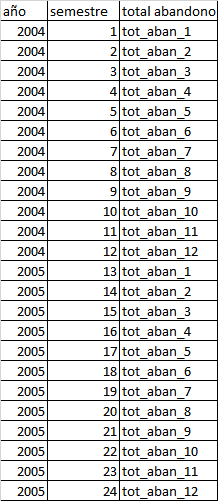


    1.6 Dibuje una gráfica con el semestre por el eje de las x y tot_aban_* (el asterisco se sustituye por los números del 1 al 12) por el eje de las y para cada año consecutivamente. Estudie nuevamente la práctica relacionada con series de tiempo y diga si encuentra estacionalidad en la gráfica obtenida

In [1]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


df=pd.read_csv('Alum.csv',encoding='cp1250')
df.head()

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PRIMERPERIODO,T,ESTATUSALUMNO,TITULACION,PRV,PRM,PAA,CatPAA,PREPA,CatPrepa,...,BECA,CREDITO,CATFIN,PROMSEM1,EDADING,CatEdad,SEXO,IdSexo,E,ECR2
0,2004,15,Egresado,Titulado,534,610,1144,1,PREPARATORIA MEXICO *9555,2,...,0.0,0,1,8.33,17.29,1,M,1,0,0
1,2004,12,Egresado,Titulado,0,0,0,3,INSTITUTO DE CIENCIAS *10059,2,...,0.0,30,2,8.60,17.94,1,M,1,0,3
2,2004,11,Egresado,Titulado,618,661,1279,2,PREPARATORIA REGIONAL DE AMECA *10173,1,...,0.0,35,2,7.86,18.51,1,M,1,0,3
3,2004,18,Egresado,Pendiente,0,0,0,3,COLEGIO GUADALAJARA *10181,2,...,0.0,0,1,8.38,18.76,1,M,1,0,0
4,2004,11,Baja,Pendiente,0,0,0,3,PREPARATORIA LA PAZ *10199,2,...,0.0,0,1,7.88,19.92,2,F,2,1,1


In [2]:
# valor más alto de PRV
maxPRV=df['PRV'].max()
# remplazar 0 con el máximo
df['PRV'] = df['PRV'].replace(0, maxPRV)

df['PRV'].head(10)

0    534
1    800
2    618
3    800
4    800
5    618
6    571
7    664
8    553
9    534
Name: PRV, dtype: int64

In [3]:
# valor más alto de PRM
maxPRM=df['PRM'].max()

# remplazar 0 con el máximo
df['PRM'] = df['PRM'].replace(0, maxPRM)


In [4]:
#reasignar PAA con la suma de PRV + PRM
df['PAA'] = df['PRV'] + df['PRM']

df['PAA'].head(10)

0    1144
1    1600
2    1279
3    1600
4    1600
5    1356
6    1098
7    1390
8    1163
9    1019
Name: PAA, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRIMERPERIODO  462 non-null    int64  
 1   T              462 non-null    int64  
 2   ESTATUSALUMNO  462 non-null    object 
 3   TITULACION     462 non-null    object 
 4   PRV            462 non-null    int64  
 5   PRM            462 non-null    int64  
 6   PAA            462 non-null    int64  
 7   CatPAA         462 non-null    int64  
 8   PREPA          462 non-null    object 
 9   CatPrepa       462 non-null    int64  
 10  LocalForanea   462 non-null    int64  
 11  CIUDADPREPA    462 non-null    object 
 12  ESTADOPREPA    462 non-null    object 
 13  CodEstado      462 non-null    int64  
 14  PROMPRE        462 non-null    int64  
 15  CatPromPre     462 non-null    int64  
 16  BECA           462 non-null    float64
 17  CREDITO        462 non-null    int64  
 18  CATFIN    

In [6]:
# Crear DataFrame con nuevas columnas para después guardar en el archivo AbandonoAnual.csv

aa=pd.DataFrame({'año':range(2004,2012)})
aa

,año
0,2004
1,2005
2,2006
3,2007
4,2008
5,2009
6,2010
7,2011


In [7]:
#aa['tot_alum']=df['PRIMERPERIODO'].value_counts()
#aa['tot_alum']
ac=df['PRIMERPERIODO'].value_counts()
ac

2010    85
2011    80
2009    71
2008    69
2007    47
2006    46
2005    41
2004    23
Name: PRIMERPERIODO, dtype: int64

In [8]:
ac.index

Int64Index([2010, 2011, 2009, 2008, 2007, 2006, 2005, 2004], dtype='int64')

In [9]:
ac.name='tot_alum'

In [10]:
# DataFrame.merge(self, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None) → 'DataFrame'[source]
# Merge DataFrame or named Series objects with a database-style join.

aa=aa.merge(ac, left_on='año', right_on=ac.index)
aa

,año,tot_alum
0,2004,23
1,2005,41
2,2006,46
3,2007,47
4,2008,69
5,2009,71
6,2010,85
7,2011,80


In [11]:
# tot_abandono (se calcula sumando la cantidad de alumnos que tengan 1 en la columna E en el año dado)
ta=df[['PRIMERPERIODO','E']].groupby(by='PRIMERPERIODO').sum()
ta.rename(columns={"E": "tot_abandono"},inplace=True)
ta

,tot_abandono
PRIMERPERIODO,
2004,4
2005,5
2006,10
2007,13
2008,19
2009,16
2010,25
2011,24


In [12]:
aa=aa.merge(ta, left_on='año', right_on=ta.index)
aa

,año,tot_alum,tot_abandono
0,2004,23,4
1,2005,41,5
2,2006,46,10
3,2007,47,13
4,2008,69,19
5,2009,71,16
6,2010,85,25
7,2011,80,24


In [13]:
ta1=df[['PRIMERPERIODO','T','E']] #filtrar las 3 columnas que necesitamos
ta1=ta1[ta1['E']==1]    # eliminar las columnas con E=0
ta1


,PRIMERPERIODO,T,E
4,2004,11,1
5,2004,8,1
6,2004,4,1
15,2004,1,1
26,2005,12,1
...,...,...,...
446,2011,9,1
448,2011,7,1
458,2011,5,1
460,2011,1,1


In [14]:
# Calcular total de alumnos que en un año T = 1 y E =1 y así sucesivamente hasta T=12 y E=1
ta1=ta1.groupby(by=['PRIMERPERIODO','T']).sum()
ta1

E
PRIMERPERIODO T    
2004          1   1
              4   1
              8   1
              11  1
2005          3   1
              8   1
              12  3
2006          1   2
              4   1
              7   3
              9   2
              10  1
              11  1
2007          1   2
              2   2
              3   1
              4   2
              5   2
              6   1
              8   1
              11  1
              12  1
2008          1   5
              3   1
              4   1
              5   5
              7   2
              8   1
              10  1
              11  1
              12  2
2009          1   3
              3   6
              4   2
              5   3
              9   1
              10  1
2010          1   8
              2   2
              3   3
              4   4
              7   3
              8   1
              9   2
              10  1
              11  1
2011          1   4
              2   2
              3   1
              4   7
              5   1
              6   1
              7   3
              9   2
              10  1
              11  1
              12  1

In [15]:
# Crear las doce columnas con 0 y nombrarlas tot_aban_1, tot_aban_2 y así sucesivamente hasta 12
for i in range(1,13):
    aa['tot_aban_'+str(i)]=0

In [16]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   año           8 non-null      int64
 1   tot_alum      8 non-null      int64
 2   tot_abandono  8 non-null      int64
 3   tot_aban_1    8 non-null      int64
 4   tot_aban_2    8 non-null      int64
 5   tot_aban_3    8 non-null      int64
 6   tot_aban_4    8 non-null      int64
 7   tot_aban_5    8 non-null      int64
 8   tot_aban_6    8 non-null      int64
 9   tot_aban_7    8 non-null      int64
 10  tot_aban_8    8 non-null      int64
 11  tot_aban_9    8 non-null      int64
 12  tot_aban_10   8 non-null      int64
 13  tot_aban_11   8 non-null      int64
 14  tot_aban_12   8 non-null      int64
dtypes: int64(15)
memory usage: 1.0 KB


In [17]:
# en i tendremos el índice que será una tupla (año, T)
# y en j la serie con los valores de la fila; en este caso que hay una sola columna (E) y habrá un solo valor
for i, j in ta1.iterrows(): 
    print('índice: ',i)
    print('valor: ', j, end='  ') 
    print() 

índice:  (2004, 1)
valor:  E    1
Name: (2004, 1), dtype: int64  
índice:  (2004, 4)
valor:  E    1
Name: (2004, 4), dtype: int64  
índice:  (2004, 8)
valor:  E    1
Name: (2004, 8), dtype: int64  
índice:  (2004, 11)
valor:  E    1
Name: (2004, 11), dtype: int64  
índice:  (2005, 3)
valor:  E    1
Name: (2005, 3), dtype: int64  
índice:  (2005, 8)
valor:  E    1
Name: (2005, 8), dtype: int64  
índice:  (2005, 12)
valor:  E    3
Name: (2005, 12), dtype: int64  
índice:  (2006, 1)
valor:  E    2
Name: (2006, 1), dtype: int64  
índice:  (2006, 4)
valor:  E    1
Name: (2006, 4), dtype: int64  
índice:  (2006, 7)
valor:  E    3
Name: (2006, 7), dtype: int64  
índice:  (2006, 9)
valor:  E    2
Name: (2006, 9), dtype: int64  
índice:  (2006, 10)
valor:  E    1
Name: (2006, 10), dtype: int64  
índice:  (2006, 11)
valor:  E    1
Name: (2006, 11), dtype: int64  
índice:  (2007, 1)
valor:  E    2
Name: (2007, 1), dtype: int64  
índice:  (2007, 2)
valor:  E    2
Name: (2007, 2), dtype: int64  
ín

In [18]:
# i[0] tiene año; i[1] tiene el semestre (del 1 al 12)
# j[0] tiene el valor de la cantidad de alumnos que en ese año y semestre se dieron de baja
for i, j in ta1.iterrows(): 
    aa.loc[aa['año']==i[0], ['tot_aban_'+str(i[1])]] = j[0]
    
aa['tot_aban_1']    

0    1
1    0
2    2
3    2
4    5
5    3
6    8
7    4
Name: tot_aban_1, dtype: int64

In [19]:
pr=df[['PRIMERPERIODO','PRV','PRM','PAA']] #filtrar las 4 columnas que necesitamos
ppr=pr.groupby(by=['PRIMERPERIODO']).mean().round(2)


ppr

,PRV,PRM,PAA
PRIMERPERIODO,,,
2004,593.39,669.00,1262.39
2005,632.78,705.80,1338.59
2006,653.48,697.87,1351.35
2007,618.60,686.60,1305.19
2008,640.61,670.33,1310.94
2009,652.63,686.69,1339.32
2010,621.45,676.14,1297.59
2011,664.88,673.80,1338.68


In [20]:
aa=aa.merge(ppr, left_on='año', right_on=ppr.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,tot_aban_8,tot_aban_9,tot_aban_10,tot_aban_11,tot_aban_12,PRV,PRM,PAA
0,2004,23,4,1,0,0,1,0,0,0,1,0,0,1,0,593.39,669.00,1262.39
1,2005,41,5,0,0,1,0,0,0,0,1,0,0,0,3,632.78,705.80,1338.59
2,2006,46,10,2,0,0,1,0,0,3,0,2,1,1,0,653.48,697.87,1351.35
3,2007,47,13,2,2,1,2,2,1,0,1,0,0,1,1,618.60,686.60,1305.19
4,2008,69,19,5,0,1,1,5,0,2,1,0,1,1,2,640.61,670.33,1310.94
5,2009,71,16,3,0,6,2,3,0,0,0,1,1,0,0,652.63,686.69,1339.32
6,2010,85,25,8,2,3,4,0,0,3,1,2,1,1,0,621.45,676.14,1297.59
7,2011,80,24,4,2,1,7,1,1,3,0,2,1,1,1,664.88,673.80,1338.68


In [21]:
catpaa=df[['PRIMERPERIODO','CatPAA']] #filtrar columnas que necesitamos para crear los 3 campos tot_PAA_1, tot_PAA_2, tot_PAA_3
catpaa=pd.crosstab(catpaa['PRIMERPERIODO'],catpaa['CatPAA'])
# Renombrar la columna
catpaa.rename(columns={1: "tot_PAA_1",2: "tot_PAA_2",3: "tot_PAA_3"},inplace=True)
catpaa

CatPAA,tot_PAA_1,tot_PAA_2,tot_PAA_3
PRIMERPERIODO,,,
2004,12,7,4
2005,15,13,13
2006,10,23,13
2007,24,11,12
2008,21,35,13
2009,21,23,27
2010,29,40,16
2011,25,41,14


In [22]:
aa=aa.merge(catpaa, left_on='año', right_on=catpaa.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_aban_9,tot_aban_10,tot_aban_11,tot_aban_12,PRV,PRM,PAA,tot_PAA_1,tot_PAA_2,tot_PAA_3
0,2004,23,4,1,0,0,1,0,0,0,...,0,0,1,0,593.39,669.00,1262.39,12,7,4
1,2005,41,5,0,0,1,0,0,0,0,...,0,0,0,3,632.78,705.80,1338.59,15,13,13
2,2006,46,10,2,0,0,1,0,0,3,...,2,1,1,0,653.48,697.87,1351.35,10,23,13
3,2007,47,13,2,2,1,2,2,1,0,...,0,0,1,1,618.60,686.60,1305.19,24,11,12
4,2008,69,19,5,0,1,1,5,0,2,...,0,1,1,2,640.61,670.33,1310.94,21,35,13
5,2009,71,16,3,0,6,2,3,0,0,...,1,1,0,0,652.63,686.69,1339.32,21,23,27
6,2010,85,25,8,2,3,4,0,0,3,...,2,1,1,0,621.45,676.14,1297.59,29,40,16
7,2011,80,24,4,2,1,7,1,1,3,...,2,1,1,1,664.88,673.80,1338.68,25,41,14


In [23]:
catedad=df[['PRIMERPERIODO','CatEdad']] #filtrar columnas que necesitamos para crear los 3 campos tot_PAA_1, tot_PAA_2, tot_PAA_3
catedad=pd.crosstab(catedad['PRIMERPERIODO'],catedad['CatEdad'])
# Renombrar la columna
catedad.rename(columns={1: "tot_catEdad_1",2: "tot_catEdad_2",3: "tot_catEdad_3"},inplace=True)
aa=aa.merge(catedad, left_on='año', right_on=catedad.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_aban_12,PRV,PRM,PAA,tot_PAA_1,tot_PAA_2,tot_PAA_3,tot_catEdad_1,tot_catEdad_2,tot_catEdad_3
0,2004,23,4,1,0,0,1,0,0,0,...,0,593.39,669.00,1262.39,12,7,4,16,7,0
1,2005,41,5,0,0,1,0,0,0,0,...,3,632.78,705.80,1338.59,15,13,13,28,13,0
2,2006,46,10,2,0,0,1,0,0,3,...,0,653.48,697.87,1351.35,10,23,13,23,21,2
3,2007,47,13,2,2,1,2,2,1,0,...,1,618.60,686.60,1305.19,24,11,12,26,17,4
4,2008,69,19,5,0,1,1,5,0,2,...,2,640.61,670.33,1310.94,21,35,13,34,32,3
5,2009,71,16,3,0,6,2,3,0,0,...,0,652.63,686.69,1339.32,21,23,27,45,23,3
6,2010,85,25,8,2,3,4,0,0,3,...,0,621.45,676.14,1297.59,29,40,16,54,26,5
7,2011,80,24,4,2,1,7,1,1,3,...,1,664.88,673.80,1338.68,25,41,14,49,28,3


In [24]:
# Promedio de edad por año
# Primero filtramos las dos columnas que necesitamos y después agrupamos por año
prom_edad=df[['PRIMERPERIODO','EDADING']].groupby(by='PRIMERPERIODO').mean()
#renombrar la columna
prom_edad.rename(columns={"EDADING": "promEdad"},inplace=True)
# Mezclar
aa=aa.merge(prom_edad, left_on='año', right_on=prom_edad.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,PRV,PRM,PAA,tot_PAA_1,tot_PAA_2,tot_PAA_3,tot_catEdad_1,tot_catEdad_2,tot_catEdad_3,promEdad
0,2004,23,4,1,0,0,1,0,0,0,...,593.39,669.00,1262.39,12,7,4,16,7,0,18.655652
1,2005,41,5,0,0,1,0,0,0,0,...,632.78,705.80,1338.59,15,13,13,28,13,0,18.737317
2,2006,46,10,2,0,0,1,0,0,3,...,653.48,697.87,1351.35,10,23,13,23,21,2,19.037174
3,2007,47,13,2,2,1,2,2,1,0,...,618.60,686.60,1305.19,24,11,12,26,17,4,19.084468
4,2008,69,19,5,0,1,1,5,0,2,...,640.61,670.33,1310.94,21,35,13,34,32,3,19.087246
5,2009,71,16,3,0,6,2,3,0,0,...,652.63,686.69,1339.32,21,23,27,45,23,3,18.899296
6,2010,85,25,8,2,3,4,0,0,3,...,621.45,676.14,1297.59,29,40,16,54,26,5,18.987176
7,2011,80,24,4,2,1,7,1,1,3,...,664.88,673.80,1338.68,25,41,14,49,28,3,18.913500


In [25]:
isex=df[['PRIMERPERIODO','IdSexo']] #filtrar columnas que necesitamos para crear los 2 campos tot_hombres y tot_mujeres
isex=pd.crosstab(isex['PRIMERPERIODO'],isex['IdSexo'])
#renombrar las columnas
isex.rename(columns={1: "tot_hombres",2: "tot_mujeres"},inplace=True)
# Mezclar
aa=aa.merge(isex, left_on='año', right_on=isex.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,PAA,tot_PAA_1,tot_PAA_2,tot_PAA_3,tot_catEdad_1,tot_catEdad_2,tot_catEdad_3,promEdad,tot_hombres,tot_mujeres
0,2004,23,4,1,0,0,1,0,0,0,...,1262.39,12,7,4,16,7,0,18.655652,22,1
1,2005,41,5,0,0,1,0,0,0,0,...,1338.59,15,13,13,28,13,0,18.737317,37,4
2,2006,46,10,2,0,0,1,0,0,3,...,1351.35,10,23,13,23,21,2,19.037174,43,3
3,2007,47,13,2,2,1,2,2,1,0,...,1305.19,24,11,12,26,17,4,19.084468,44,3
4,2008,69,19,5,0,1,1,5,0,2,...,1310.94,21,35,13,34,32,3,19.087246,63,6
5,2009,71,16,3,0,6,2,3,0,0,...,1339.32,21,23,27,45,23,3,18.899296,64,7
6,2010,85,25,8,2,3,4,0,0,3,...,1297.59,29,40,16,54,26,5,18.987176,78,7
7,2011,80,24,4,2,1,7,1,1,3,...,1338.68,25,41,14,49,28,3,18.913500,70,10


In [26]:
#filtrar columnas que necesitamos para crear los 2 campos tot_Titulados y tot_Pendientes
t=df[['PRIMERPERIODO','TITULACION']] 
t=pd.crosstab(t['PRIMERPERIODO'],t['TITULACION'])
#renombrar las columnas
t.rename(columns={'Titulado': "tot_Titulados",'Pendiente': "tot_Pendientes"},inplace=True)
# Mezclar
aa=aa.merge(t, left_on='año', right_on=t.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_PAA_2,tot_PAA_3,tot_catEdad_1,tot_catEdad_2,tot_catEdad_3,promEdad,tot_hombres,tot_mujeres,tot_Pendientes,tot_Titulados
0,2004,23,4,1,0,0,1,0,0,0,...,7,4,16,7,0,18.655652,22,1,9,14
1,2005,41,5,0,0,1,0,0,0,0,...,13,13,28,13,0,18.737317,37,4,8,33
2,2006,46,10,2,0,0,1,0,0,3,...,23,13,23,21,2,19.037174,43,3,15,31
3,2007,47,13,2,2,1,2,2,1,0,...,11,12,26,17,4,19.084468,44,3,18,29
4,2008,69,19,5,0,1,1,5,0,2,...,35,13,34,32,3,19.087246,63,6,22,47
5,2009,71,16,3,0,6,2,3,0,0,...,23,27,45,23,3,18.899296,64,7,19,52
6,2010,85,25,8,2,3,4,0,0,3,...,40,16,54,26,5,18.987176,78,7,38,47
7,2011,80,24,4,2,1,7,1,1,3,...,41,14,49,28,3,18.913500,70,10,40,40


In [27]:
#filtrar columnas que necesitamos para crear los 4 campos tot_Egresados, totCambios, tot_Bajas y tot_Activos
ea=df[['PRIMERPERIODO','ESTATUSALUMNO']] 
ea=pd.crosstab(ea['PRIMERPERIODO'],ea['ESTATUSALUMNO'])
#renombrar las columnas
ea.rename(columns={'Activo': "tot_Activos",'Baja': "tot_Bajas",'Cambio de plan': "tot_Cambios",'Egresado': "tot_Egresados"},inplace=True)
# Mezclar
aa=aa.merge(ea, left_on='año', right_on=ea.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_catEdad_3,promEdad,tot_hombres,tot_mujeres,tot_Pendientes,tot_Titulados,tot_Activos,tot_Bajas,tot_Cambios,tot_Egresados
0,2004,23,4,1,0,0,1,0,0,0,...,0,18.655652,22,1,9,14,0,7,0,16
1,2005,41,5,0,0,1,0,0,0,0,...,0,18.737317,37,4,8,33,0,8,0,33
2,2006,46,10,2,0,0,1,0,0,3,...,2,19.037174,43,3,15,31,0,12,3,31
3,2007,47,13,2,2,1,2,2,1,0,...,4,19.084468,44,3,18,29,1,11,3,32
4,2008,69,19,5,0,1,1,5,0,2,...,3,19.087246,63,6,22,47,0,21,1,47
5,2009,71,16,3,0,6,2,3,0,0,...,3,18.899296,64,7,19,52,2,12,4,53
6,2010,85,25,8,2,3,4,0,0,3,...,5,18.987176,78,7,38,47,7,24,5,49
7,2011,80,24,4,2,1,7,1,1,3,...,3,18.913500,70,10,40,40,9,22,5,44


In [28]:
#filtrar columnas que necesitamos para crear los 2 campos tot_Locales, tot_Foraneao
lf=df[['PRIMERPERIODO','LocalForanea']] 
lf=pd.crosstab(lf['PRIMERPERIODO'],lf['LocalForanea'])
#renombrar las columnas
lf.rename(columns={1: "tot_Locales",2: "tot_Foraneos"},inplace=True)
# Mezclar
aa=aa.merge(lf, left_on='año', right_on=lf.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_hombres,tot_mujeres,tot_Pendientes,tot_Titulados,tot_Activos,tot_Bajas,tot_Cambios,tot_Egresados,tot_Locales,tot_Foraneos
0,2004,23,4,1,0,0,1,0,0,0,...,22,1,9,14,0,7,0,16,16,7
1,2005,41,5,0,0,1,0,0,0,0,...,37,4,8,33,0,8,0,33,25,16
2,2006,46,10,2,0,0,1,0,0,3,...,43,3,15,31,0,12,3,31,35,11
3,2007,47,13,2,2,1,2,2,1,0,...,44,3,18,29,1,11,3,32,25,22
4,2008,69,19,5,0,1,1,5,0,2,...,63,6,22,47,0,21,1,47,41,28
5,2009,71,16,3,0,6,2,3,0,0,...,64,7,19,52,2,12,4,53,51,20
6,2010,85,25,8,2,3,4,0,0,3,...,78,7,38,47,7,24,5,49,46,39
7,2011,80,24,4,2,1,7,1,1,3,...,70,10,40,40,9,22,5,44,52,28


In [29]:
# Filtrar a los de Jalisco
ej=df[df['ESTADOPREPA']=='JALISCO']
# Dejar solo dos columnas
ej=ej[['PRIMERPERIODO','ESTADOPREPA']] 
# Hacer el conteo de cuántos son de Jalisco
ej=pd.crosstab(ej['PRIMERPERIODO'],ej['ESTADOPREPA'])
# Renombrar la columna
ej.rename(columns={"JALISCO": "tot_Jalisco"},inplace=True)
# Incorporar al DataFrame aa
aa=aa.merge(ej, left_on='año', right_on=ej.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_mujeres,tot_Pendientes,tot_Titulados,tot_Activos,tot_Bajas,tot_Cambios,tot_Egresados,tot_Locales,tot_Foraneos,tot_Jalisco
0,2004,23,4,1,0,0,1,0,0,0,...,1,9,14,0,7,0,16,16,7,19
1,2005,41,5,0,0,1,0,0,0,0,...,4,8,33,0,8,0,33,25,16,30
2,2006,46,10,2,0,0,1,0,0,3,...,3,15,31,0,12,3,31,35,11,38
3,2007,47,13,2,2,1,2,2,1,0,...,3,18,29,1,11,3,32,25,22,32
4,2008,69,19,5,0,1,1,5,0,2,...,6,22,47,0,21,1,47,41,28,45
5,2009,71,16,3,0,6,2,3,0,0,...,7,19,52,2,12,4,53,51,20,57
6,2010,85,25,8,2,3,4,0,0,3,...,7,38,47,7,24,5,49,46,39,53
7,2011,80,24,4,2,1,7,1,1,3,...,10,40,40,9,22,5,44,52,28,61


In [30]:
# Filtrar a los que no son de Jalisco
eo=df[df['ESTADOPREPA']!='JALISCO']
# Dejar solo las dos columnas que requiero
eo=eo[['PRIMERPERIODO','ESTADOPREPA']]
# Hacer el conteo de cuántos no son de Jalisco
eo=eo.groupby(by=['PRIMERPERIODO']).count()
# Renombrar la columna
eo.rename(columns={"ESTADOPREPA": "tot_OtrosEstados"},inplace=True)
# Incorporar al DataFrame aa
aa=aa.merge(eo, left_on='año', right_on=eo.index)

aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_Pendientes,tot_Titulados,tot_Activos,tot_Bajas,tot_Cambios,tot_Egresados,tot_Locales,tot_Foraneos,tot_Jalisco,tot_OtrosEstados
0,2004,23,4,1,0,0,1,0,0,0,...,9,14,0,7,0,16,16,7,19,4
1,2005,41,5,0,0,1,0,0,0,0,...,8,33,0,8,0,33,25,16,30,11
2,2006,46,10,2,0,0,1,0,0,3,...,15,31,0,12,3,31,35,11,38,8
3,2007,47,13,2,2,1,2,2,1,0,...,18,29,1,11,3,32,25,22,32,15
4,2008,69,19,5,0,1,1,5,0,2,...,22,47,0,21,1,47,41,28,45,24
5,2009,71,16,3,0,6,2,3,0,0,...,19,52,2,12,4,53,51,20,57,14
6,2010,85,25,8,2,3,4,0,0,3,...,38,47,7,24,5,49,46,39,53,32
7,2011,80,24,4,2,1,7,1,1,3,...,40,40,9,22,5,44,52,28,61,19


In [31]:
'''# Renombrar la columna
ej.rename(columns={"JALISCO": "tot_Jalisco"},inplace=True)
# Incorporar al DataFrame aa
aa=aa.merge(ej, left_on='año', right_on=ej.index)
aa'''

'# Renombrar la columna\nej.rename(columns={"JALISCO": "tot_Jalisco"},inplace=True)\n# Incorporar al DataFrame aa\naa=aa.merge(ej, left_on=\'año\', right_on=ej.index)\naa'

In [32]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   año               8 non-null      int64  
 1   tot_alum          8 non-null      int64  
 2   tot_abandono      8 non-null      int64  
 3   tot_aban_1        8 non-null      int64  
 4   tot_aban_2        8 non-null      int64  
 5   tot_aban_3        8 non-null      int64  
 6   tot_aban_4        8 non-null      int64  
 7   tot_aban_5        8 non-null      int64  
 8   tot_aban_6        8 non-null      int64  
 9   tot_aban_7        8 non-null      int64  
 10  tot_aban_8        8 non-null      int64  
 11  tot_aban_9        8 non-null      int64  
 12  tot_aban_10       8 non-null      int64  
 13  tot_aban_11       8 non-null      int64  
 14  tot_aban_12       8 non-null      int64  
 15  PRV               8 non-null      float64
 16  PRM               8 non-null      float64
 17  P

In [63]:
#Creación de documento csv 
aa.to_csv('AbandonoAnual.csv', index=False)

In [33]:
# Creación de la serie con 96 elementos
s_aban=aa[['tot_aban_1','tot_aban_2','tot_aban_3','tot_aban_4','tot_aban_5','tot_aban_6','tot_aban_7','tot_aban_8','tot_aban_9','tot_aban_10','tot_aban_11','tot_aban_12']]
s_aban=s_aban.T

s_aban.reset_index(drop=True, inplace=True)
s_aban.rename(columns={0:2004,1:2005,2:2006,3:2007,4:2008,5:2009,6:2010,7:2011,}, inplace=True)
s_aban
    

,2004,2005,2006,2007,2008,2009,2010,2011
0,1,0,2,2,5,3,8,4
1,0,0,0,2,0,0,2,2
2,0,1,0,1,1,6,3,1
3,1,0,1,2,1,2,4,7
4,0,0,0,2,5,3,0,1
5,0,0,0,1,0,0,0,1
6,0,0,3,0,2,0,3,3
7,1,1,0,1,1,0,1,0
8,0,0,2,0,0,1,2,2
9,0,0,1,0,1,1,1,1


In [34]:
serie_aban=pd.Series(s_aban[2004])

for i in range (2005,2012):
    serie_aban=serie_aban.append(s_aban[i])

serie_aban=pd.DataFrame(serie_aban)
serie_aban.rename(columns={0:'total_abandono'}, inplace=True)
serie_aban.reset_index(drop=True, inplace=True)
serie_aban

,total_abandono
0,1
1,0
2,0
3,1
4,0
...,...
91,0
92,2
93,1
94,1


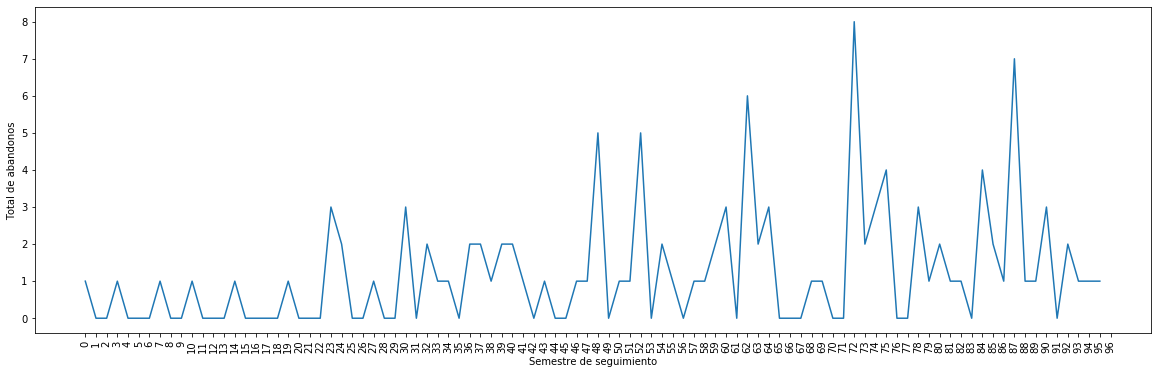

In [35]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(20,6))
#plot(y)           # plot y using x as index array 0..N-1
plt.plot(serie_aban['total_abandono'])
# modificar xtics
plt.xticks(ticks=range(0,97),rotation=90)
# Nombrar eje x
plt.xlabel('Semestre de seguimiento')
# Nombrar eje y
plt.ylabel('Total de abandonos')
# Poner título al diagrama

plt.show()

In [36]:
#Crear la serie y luego asignarla a la nueva columna
a=2004
sem=[]
for i in range(8):
    for j in range(12):
        sem.append(str(a) + '_' + str(j))
    a +=1
    
#sem
serie_aban['fecha']=np.array(sem)
serie_aban


,total_abandono,fecha
0,1,2004_0
1,0,2004_1
2,0,2004_2
3,1,2004_3
4,0,2004_4
...,...,...
91,0,2011_7
92,2,2011_8
93,1,2011_9
94,1,2011_10


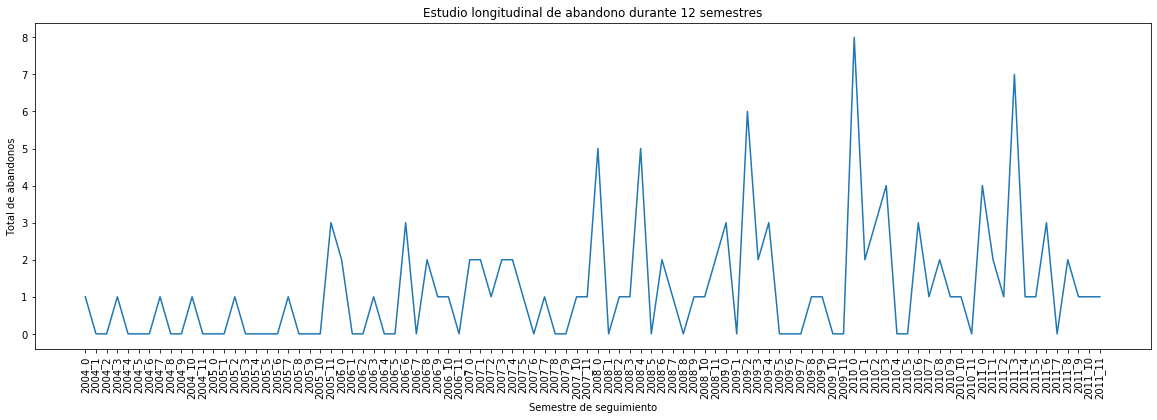

In [37]:
fig,ax=plt.subplots(figsize=(20,6))
#plot(y)           # plot y using x as index array 0..N-1
plt.plot(serie_aban['fecha'],serie_aban['total_abandono'])
# modificar xtics

# Nombrar eje x
plt.xlabel('Semestre de seguimiento')
# Nombrar eje y
plt.ylabel('Total de abandonos')
# Poner título al diagrama
plt.title('Estudio longitudinal de abandono durante 12 semestres')
plt.xticks(rotation=90)

plt.show()

1.4 Dibuje una gráfica con el año en el eje de las x y en el eje vertical (y) la columna "tot_abandono".
    
    1.5 Prepare un conjunto de datos con los semestres con índice del 0 al 95 (un total de 96 semestres debido a que tenemos datos del 2004 al 2011 y doce (12) semestres de seguimiento para cada alumno). 

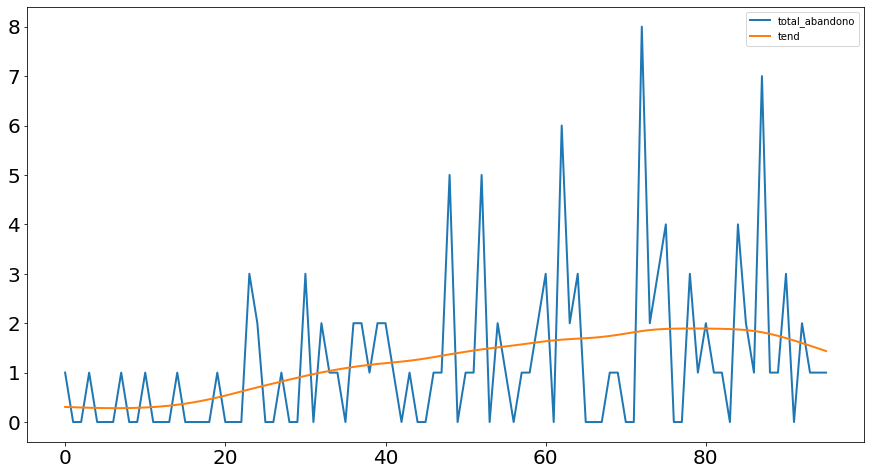

In [38]:
# Filtro Hodrick-Prescott para separar en tendencia y componente cíclico
import statsmodels.api as sm

df_ciclo, df_tend=sm.tsa.filters.hpfilter(serie_aban['total_abandono'])
serie_aban['tend']=df_tend
#df_st_dodgers_r.head()
serie_aban[['total_abandono','tend']].plot(figsize=(15,8), linewidth=2, fontsize=20)
legend=plt.legend()

La tendencia de largo plazo es creciente (si también lo es el aumento de matrícula, habría que analizar tasas).

No hay una variación estacional (cíclica regular.


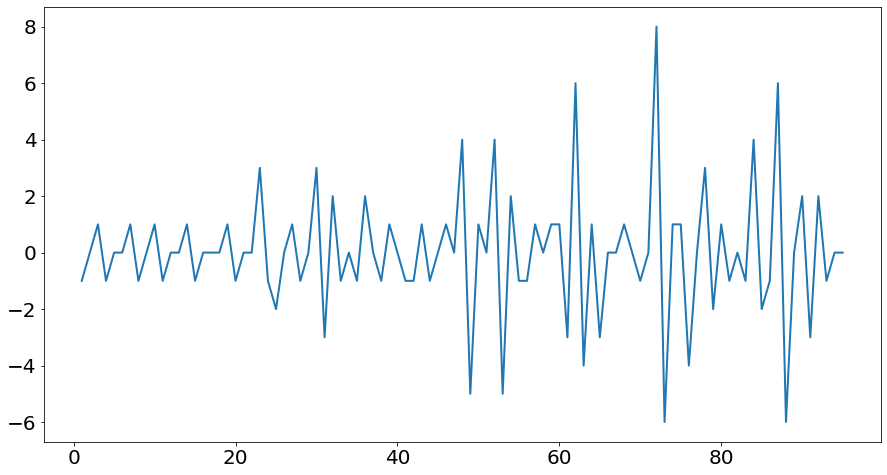

In [64]:
#Calcular y mostrar la diferencia de primer orden eliminando la tendencia

serie_aban['total_abandono'].diff().plot(figsize=(15,8), linewidth=2, fontsize=20)
plt.show()

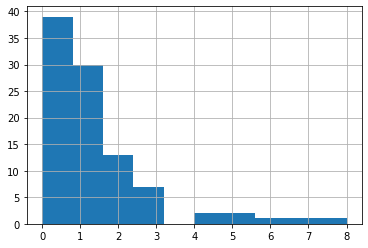

In [65]:
serie_aban['total_abandono'].hist()

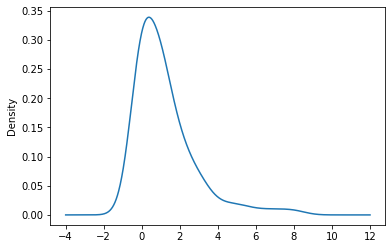

In [66]:
serie_aban['total_abandono'].plot(kind='kde')

Se crea un gráfico que proporciona un resumen más claro de la distribución de observaciones. Podemos ver que quizás la distribución es poco asimétrica y quizás un poco puntiaguda para ser gaussiana.


Ver una distribución como esta puede sugerir más tarde explorar pruebas de hipótesis estadísticas para verificar formalmente si la distribución es gaussiana y quizás técnicas de preparación de datos para remodelar la distribución, como la transformación Box-Cox.

### Crear gráficas con otras variables para ver su comportamiento en el tiempo

In [42]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   año               8 non-null      int64  
 1   tot_alum          8 non-null      int64  
 2   tot_abandono      8 non-null      int64  
 3   tot_aban_1        8 non-null      int64  
 4   tot_aban_2        8 non-null      int64  
 5   tot_aban_3        8 non-null      int64  
 6   tot_aban_4        8 non-null      int64  
 7   tot_aban_5        8 non-null      int64  
 8   tot_aban_6        8 non-null      int64  
 9   tot_aban_7        8 non-null      int64  
 10  tot_aban_8        8 non-null      int64  
 11  tot_aban_9        8 non-null      int64  
 12  tot_aban_10       8 non-null      int64  
 13  tot_aban_11       8 non-null      int64  
 14  tot_aban_12       8 non-null      int64  
 15  PRV               8 non-null      float64
 16  PRM               8 non-null      float64
 17  P

# c.1 Analizar la serie de promedios de razonamiento verbal y razonamiento matemático

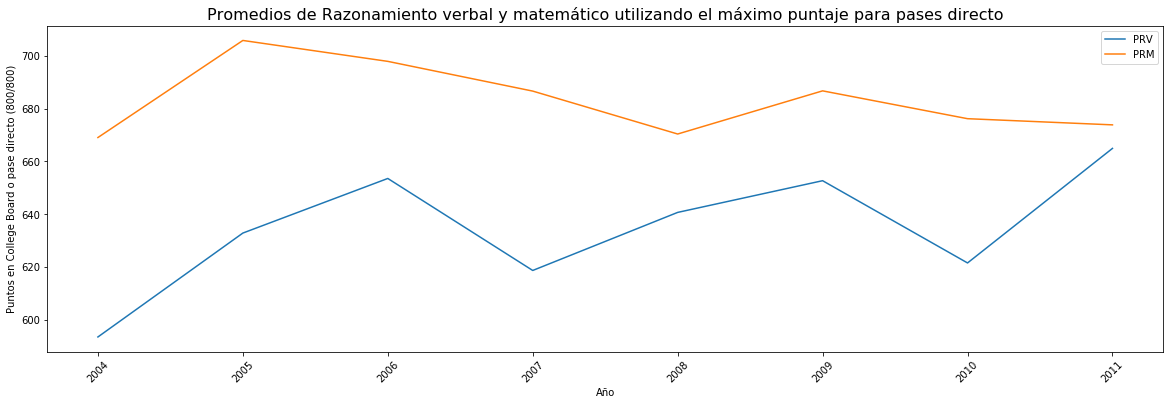

In [43]:
# Comportamiento en el tiempo de PRV y PRM
fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(aa['PRV'], label='PRV')
plt.plot(aa['PRM'], label='PRM')
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Puntos en College Board o pase directo (800/800)')
# Poner título al diagrama
titulo='Promedios de Razonamiento verbal y matemático utilizando el máximo puntaje para pases directo'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

Las dos series evidencian seguir un comportamiento moderadamente similar; si bien las habilidades matemáticas se muestran como el punto fuerte indiscutible de los aspirantes a la Ingeniería X. En principio, valdría la pena hacer las siguientes observaciones: 



1. Ninguna de las dos series parece tener una distribución normal.

2. Podríamos usar las generaciones 2004, 2007 y 2010 como outliers ya que tienen aspirantes con valores muy arriba o muy por debajo del promedio.

3. No parece haber evidencia de la existencia de una tendencia orientada hacia la equiparación entre los puntajes de los dominios matematico y verbal.




# c.2 Analizar la serie de total de mujeres y hombres, así como la serie de tasas de mujeres y hombres (respecto al total). Explicar lo que aporta el análisis de totales y el análisis de tasas.

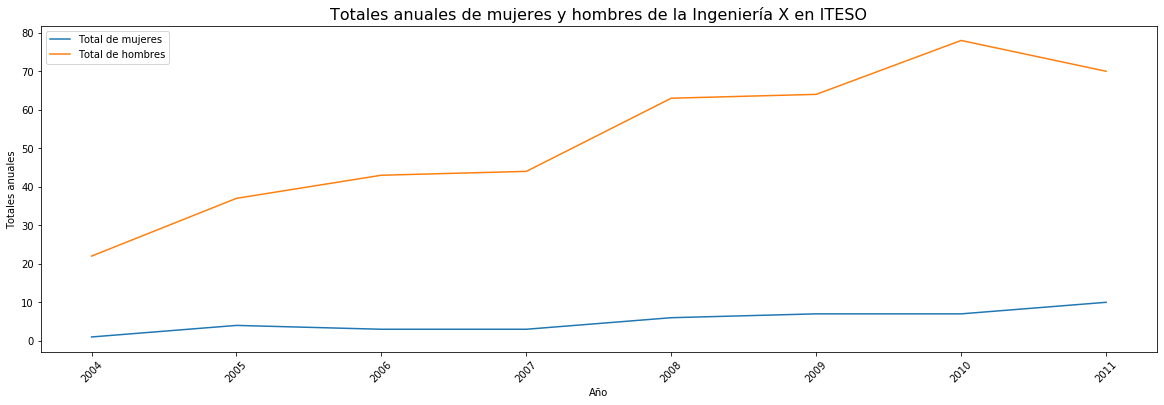

In [44]:
# Comportamiento en el tiempo de total de mujeres y hombres
fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(aa['tot_mujeres'], label='Total de mujeres')
plt.plot(aa['tot_hombres'], label='Total de hombres')
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Totales anuales')
# Poner título al diagrama
titulo='Totales anuales de mujeres y hombres de la Ingeniería X en ITESO'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()


Las dos series son muy parecidas, siguen un comportamiento muy similar y agrego la siguiente observación:


Una vez analizada la descripción podemos ver que ya diferencia entre estas series esta en la magnitud, ya que la media y desviación estandar se dan en proporciones similares.

# c.3 Analizar series de totales de locales (Zona Metropolitana de Guadalajara) y foráneos y tasas de locales y foráneos.

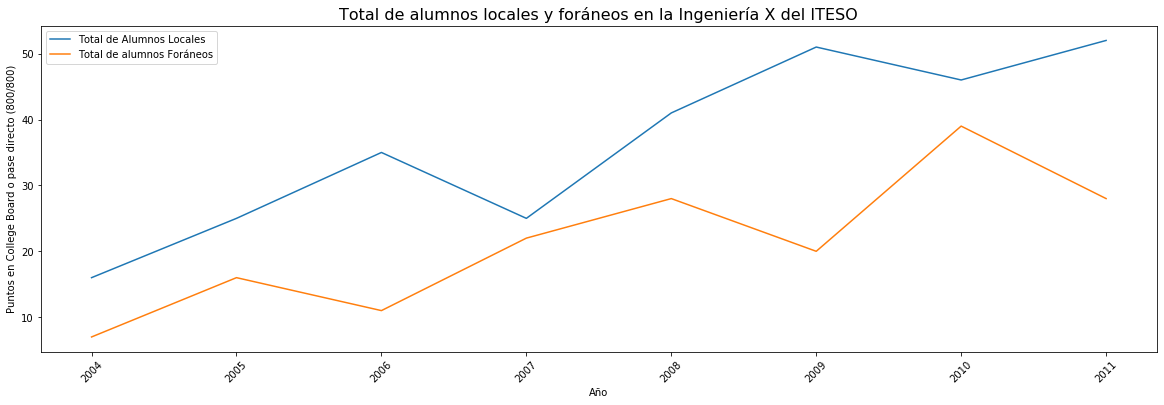

In [46]:
# Comportamiento en el tiempo de Locales y Foráneos
fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(aa['tot_Locales'], label='Total de Alumnos Locales')
plt.plot(aa['tot_Foraneos'], label='Total de alumnos Foráneos')
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Puntos en College Board o pase directo (800/800)')
# Poner título al diagrama
titulo='Total de alumnos locales y foráneos en la Ingeniería X del ITESO'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

Estas series presentan tambien un comportamiento muy similar y al igual que la pasada la diferencia entre ellas tiene que ver mas con la magnitud, su media y varianzas son proporcionales y casi podríamos asegurar que son dependientes.

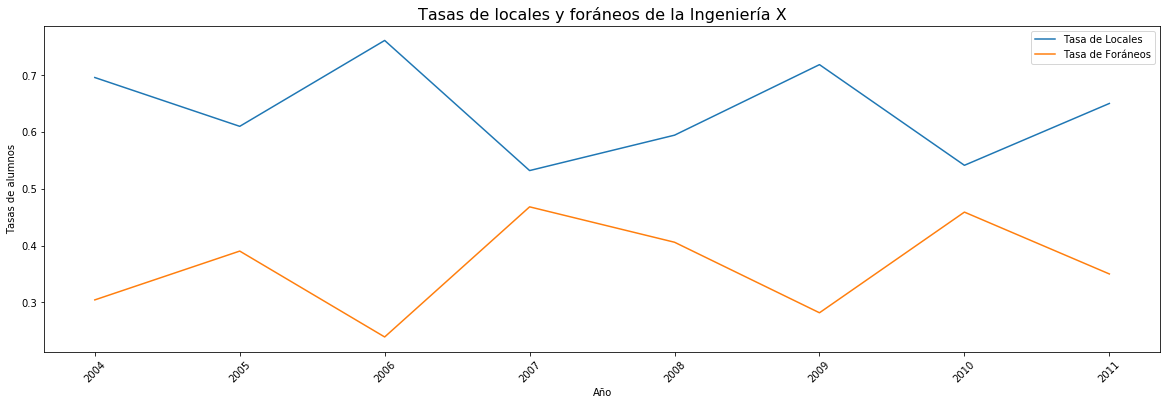

In [47]:
# Como la matrícula se va incrementando es conveniente analizar las tasas
tasa_loc=aa['tot_Locales']/aa['tot_alum']
tasa_for=aa['tot_Foraneos']/aa['tot_alum']

fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(tasa_loc, label='Tasa de Locales')
plt.plot(tasa_for, label='Tasa de Foráneos')
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Tasas de alumnos')
# Poner título al diagrama
titulo='Tasas de locales y foráneos de la Ingeniería X'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

# c.4 Analizar series de totales de alumnos de Jalisco y de otros estados y sus tasas. Analizar similitudes y diferencias con c.3

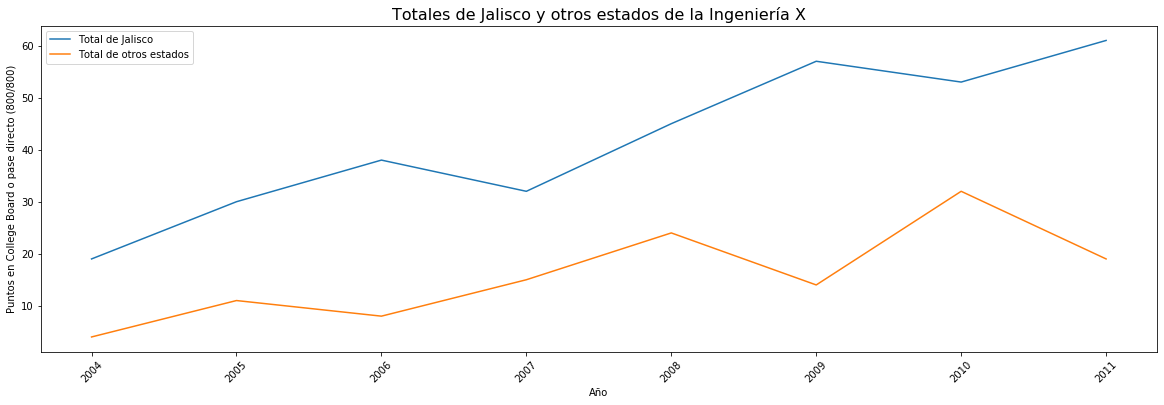

In [48]:
# Comportamiento en el tiempo de alumnos de Jalisco y Otros estados
fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(aa['tot_Jalisco'], label='Total de Jalisco')
plt.plot(aa['tot_OtrosEstados'], label='Total de otros estados')
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Puntos en College Board o pase directo (800/800)')
# Poner título al diagrama
titulo='Totales de Jalisco y otros estados de la Ingeniería X'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

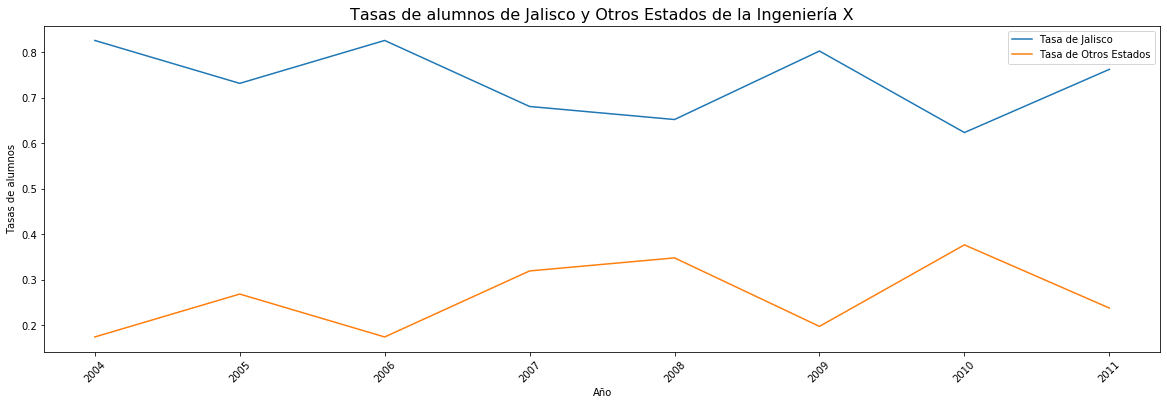

In [49]:
# Como la matrícula se va incrementando, es conveniente analizar las tasas
tasa_jal=aa['tot_Jalisco']/aa['tot_alum']
tasa_otros=aa['tot_OtrosEstados']/aa['tot_alum']

fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(tasa_jal, label='Tasa de Jalisco')
plt.plot(tasa_otros, label='Tasa de Otros Estados')
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Tasas de alumnos')
# Poner título al diagrama
titulo='Tasas de alumnos de Jalisco y Otros Estados de la Ingeniería X'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

La serie se comporta de manera muy parecida con la del punto c3, lo que me hace pensar que la mayoría de estudiantes de Jalisco son de la ZMG, mientras que mayoría de foraneos son de otros estados de la república.

# c.5 Analizar series de totales de Titulados y Pendientes (Egresados no titulados y Activos) y sus tasas.

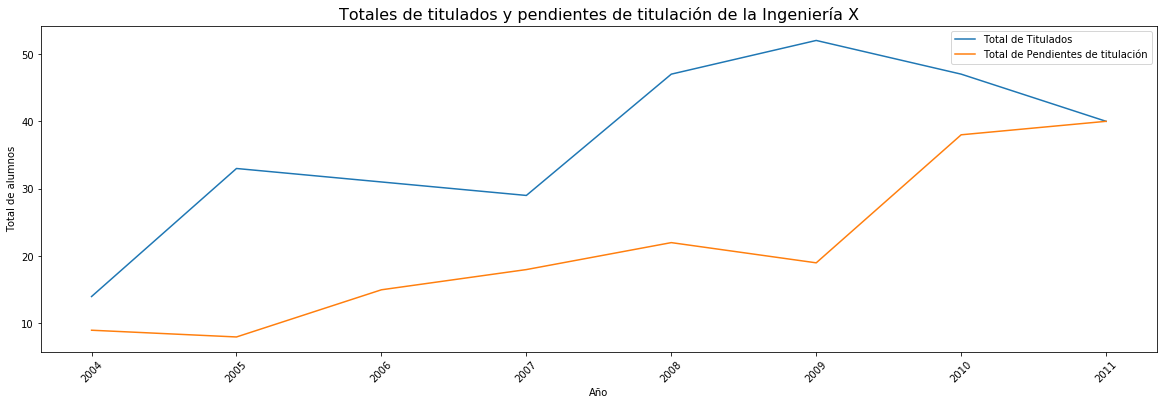

In [50]:
# Comportamiento en el tiempo de alumnos Titulados y pendientes
fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(aa['tot_Titulados'], label='Total de Titulados')
plt.plot(aa['tot_Pendientes'], label='Total de Pendientes de titulación')
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Total de alumnos')
# Poner título al diagrama
titulo='Totales de titulados y pendientes de titulación de la Ingeniería X'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

Como habrá notado, si las matrículas aumentan, las gráficas son engañosas. Un analista debe optar por analizar tasas en lugar de totales

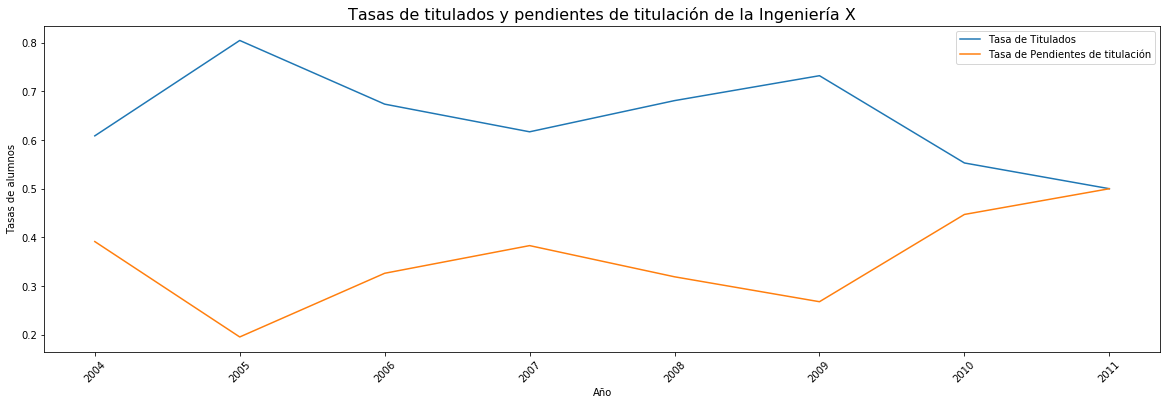

In [51]:
tasa_tit=aa['tot_Titulados']/aa['tot_alum']
tasa_pen=aa['tot_Pendientes']/aa['tot_alum']

fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(tasa_tit, label='Tasa de Titulados')
plt.plot(tasa_pen, label='Tasa de Pendientes de titulación')
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Tasas de alumnos')
# Poner título al diagrama
titulo='Tasas de titulados y pendientes de titulación de la Ingeniería X'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

# c.6 Analizar series de totales de Egresados, Cambios, Bajas, Activos y sus tasas.

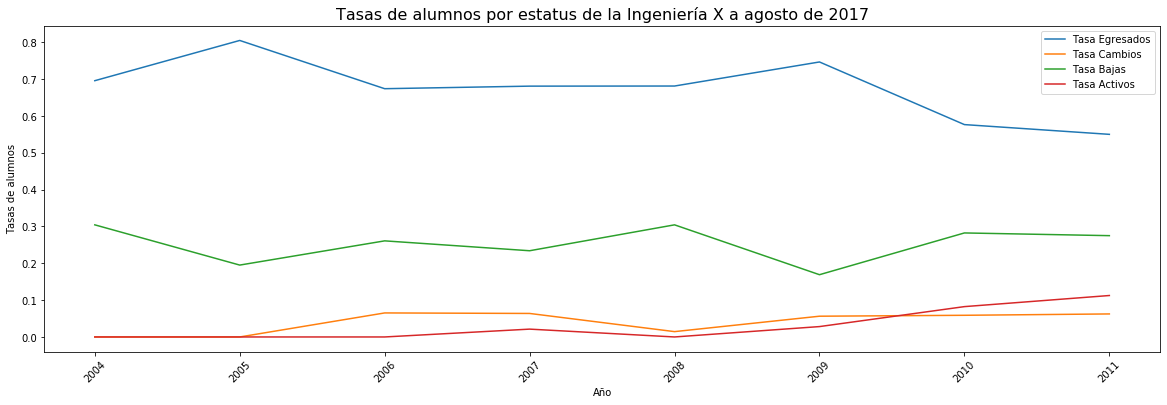

In [52]:
# Como la matrícula se va incrementando es conveniente analizar las tasas de los estatus de alumnos
fig,ax=plt.subplots(figsize=(20,6))
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Tasas de alumnos')
# Poner título al diagrama
titulo='Tasas de alumnos por estatus de la Ingeniería X a agosto de 2017'
plt.title(titulo,fontsize=16)

for i in ('tot_Egresados','tot_Cambios','tot_Bajas','tot_Activos'):
    tasa=aa[i]/aa['tot_alum']
    plt.plot(tasa, label='Tasa '+ i[4:])

ax.legend()
plt.show()

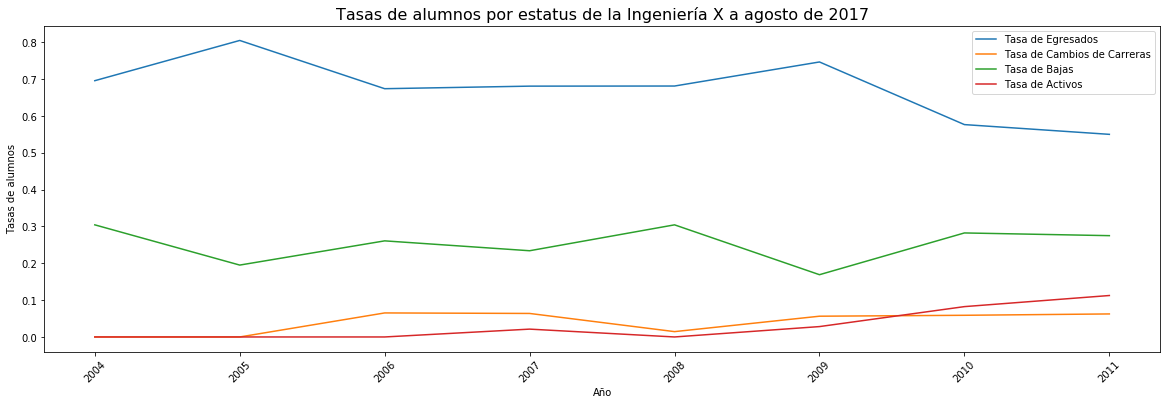

In [53]:
# Como la matrícula se va incrementando es conveniente analizar las tasas de los estatus de alumnos
tasa_egr=aa['tot_Egresados']/aa['tot_alum']
tasa_cam=aa['tot_Cambios']/aa['tot_alum']
tasa_baj=aa['tot_Bajas']/aa['tot_alum']
tasa_act=aa['tot_Activos']/aa['tot_alum']

fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(tasa_egr, label='Tasa de Egresados')
plt.plot(tasa_cam, label='Tasa de Cambios de Carreras')
plt.plot(tasa_baj, label='Tasa de Bajas')
plt.plot(tasa_act, label='Tasa de Activos')
# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Tasas de alumnos')
# Poner título al diagrama
titulo='Tasas de alumnos por estatus de la Ingeniería X a agosto de 2017'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

Desde el año 2009 podemos ver un incremento en la tasa de estudiantes en activo, sin embargo la tasa se egresados ha caído desde el mismo año, podríamos investigar acerca de que las políticas que se han implementado desde este año que haya hecho este cambio.

In [54]:
# Calcular Total Financiamiento y graficarlo
#filtrar columnas que necesitamos para crear el campo tot_Fin
fi=df[['PRIMERPERIODO','CATFIN']] 
fi=fi[fi['CATFIN']==1]    # eliminar las columnas con CATFIN=0
fi=pd.crosstab(fi['PRIMERPERIODO'],fi['CATFIN'])
#renombrar las columnas
fi.rename(columns={1: "tot_Fin"},inplace=True)
# Mezclar
aa=aa.merge(fi, left_on='año', right_on=fi.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_Titulados,tot_Activos,tot_Bajas,tot_Cambios,tot_Egresados,tot_Locales,tot_Foraneos,tot_Jalisco,tot_OtrosEstados,tot_Fin
0,2004,23,4,1,0,0,1,0,0,0,...,14,0,7,0,16,16,7,19,4,9
1,2005,41,5,0,0,1,0,0,0,0,...,33,0,8,0,33,25,16,30,11,13
2,2006,46,10,2,0,0,1,0,0,3,...,31,0,12,3,31,35,11,38,8,20
3,2007,47,13,2,2,1,2,2,1,0,...,29,1,11,3,32,25,22,32,15,26
4,2008,69,19,5,0,1,1,5,0,2,...,47,0,21,1,47,41,28,45,24,29
5,2009,71,16,3,0,6,2,3,0,0,...,52,2,12,4,53,51,20,57,14,25
6,2010,85,25,8,2,3,4,0,0,3,...,47,7,24,5,49,46,39,53,32,43
7,2011,80,24,4,2,1,7,1,1,3,...,40,9,22,5,44,52,28,61,19,26


# c.7 Analizar serie de total de alumnos con financiamiento por año.

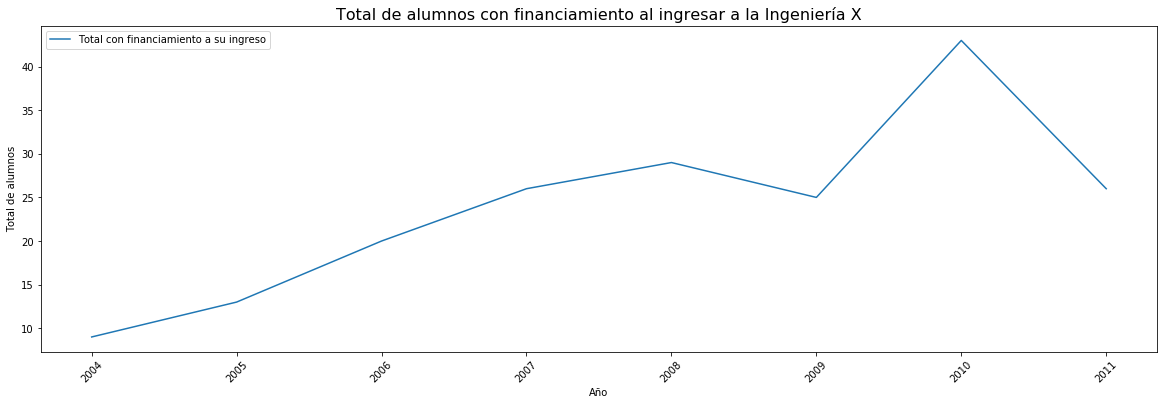

In [55]:
# Comportamiento en el tiempo de alumnos con financiamiento
fig,ax=plt.subplots(figsize=(20,6))
# Graficar la línea de tiempo
plt.plot(aa['tot_Fin'], label='Total con financiamiento a su ingreso')

# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Total de alumnos')
# Poner título al diagrama
titulo='Total de alumnos con financiamiento al ingresar a la Ingeniería X'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

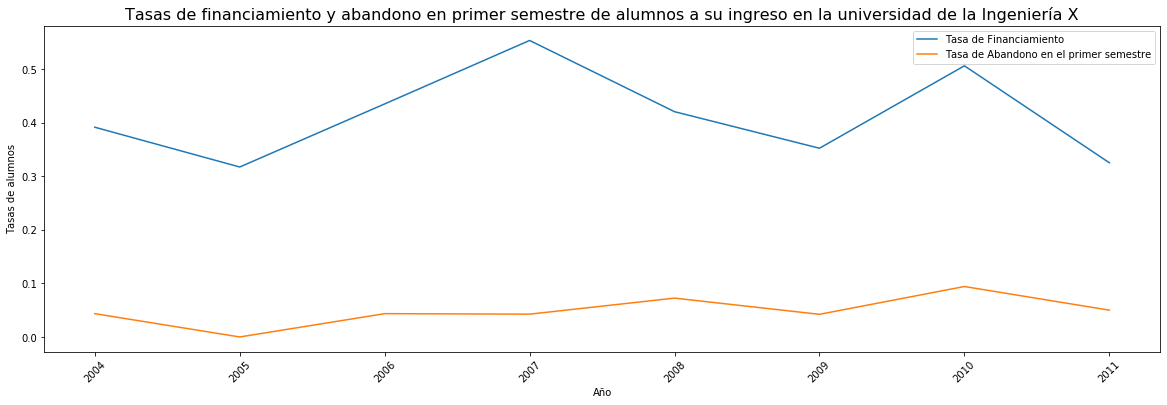

In [56]:
# Como la matrícula se va incrementando es conveniente analizar las tasas de financiamiento a través del tiempo
tasa_fin=aa['tot_Fin']/aa['tot_alum']
tasa_aban1=aa['tot_aban_1']/aa['tot_alum']
fig,ax=plt.subplots(figsize=(20,6))
# Graficar las dos líneas de tiempo
plt.plot(tasa_fin, label='Tasa de Financiamiento')
plt.plot(tasa_aban1, label='Tasa de Abandono en el primer semestre')

# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Tasas de alumnos')
# Poner título al diagrama
titulo='Tasas de financiamiento y abandono en primer semestre de alumnos a su ingreso en la universidad de la Ingeniería X'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

In [57]:
# Calculemos la correlación entre las dos columnas (dos Series)
tasa_fin.corr(tasa_aban1)

0.5295334777196524

La tasa de financiamiento de los alumnos presentó un incremento en el año 2010, sin embargo en el 2011 esta bajo y comparandola con la tasa de abandono del primer semestre podríamos creer que estas dos estan altamente correlacionadas e incluso después de hacer el análisis de correlación vemos que si existe, pero no es tan alta como creeríamos.

# c.8 Analizar series de medias de promedio de preparatoria/10 (para llevarlo a escala de 10) y promedio de primer semestre.

In [58]:
# Calcular media anual de promedio de preparatoria y promedio de primer semestre
med=df[['PRIMERPERIODO','PROMPRE','PROMSEM1']] #filtrar las 2 columnas que necesitamos
med_prom=med.groupby(by=['PRIMERPERIODO']).mean().round(2)
med_prom.rename(columns={'PROMPRE': "media_prom_pre",'PROMSEM1':'media_prom_sem_1'},inplace=True)
# Mezclar
aa=aa.merge(med_prom, left_on='año', right_on=med_prom.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_Bajas,tot_Cambios,tot_Egresados,tot_Locales,tot_Foraneos,tot_Jalisco,tot_OtrosEstados,tot_Fin,media_prom_pre,media_prom_sem_1
0,2004,23,4,1,0,0,1,0,0,0,...,7,0,16,16,7,19,4,9,81.91,7.90
1,2005,41,5,0,0,1,0,0,0,0,...,8,0,33,25,16,30,11,13,82.80,8.33
2,2006,46,10,2,0,0,1,0,0,3,...,12,3,31,35,11,38,8,20,83.28,8.58
3,2007,47,13,2,2,1,2,2,1,0,...,11,3,32,25,22,32,15,26,82.32,8.00
4,2008,69,19,5,0,1,1,5,0,2,...,21,1,47,41,28,45,24,29,81.17,8.29
5,2009,71,16,3,0,6,2,3,0,0,...,12,4,53,51,20,57,14,25,84.31,8.51
6,2010,85,25,8,2,3,4,0,0,3,...,24,5,49,46,39,53,32,43,82.25,8.23
7,2011,80,24,4,2,1,7,1,1,3,...,22,5,44,52,28,61,19,26,83.34,8.55


In [59]:
# Calcular mediana anual de promedio de preparatoria y promedio de primer semestre
medi_prom=med.groupby(by=['PRIMERPERIODO']).median().round(2)
medi_prom.rename(columns={'PROMPRE': "mediana_prom_pre",'PROMSEM1':'mediana_prom_sem_1'},inplace=True)
# Mezclar
aa=aa.merge(medi_prom, left_on='año', right_on=medi_prom.index)
aa

,año,tot_alum,tot_abandono,tot_aban_1,tot_aban_2,tot_aban_3,tot_aban_4,tot_aban_5,tot_aban_6,tot_aban_7,...,tot_Egresados,tot_Locales,tot_Foraneos,tot_Jalisco,tot_OtrosEstados,tot_Fin,media_prom_pre,media_prom_sem_1,mediana_prom_pre,mediana_prom_sem_1
0,2004,23,4,1,0,0,1,0,0,0,...,16,16,7,19,4,9,81.91,7.90,81,7.88
1,2005,41,5,0,0,1,0,0,0,0,...,33,25,16,30,11,13,82.80,8.33,83,8.50
2,2006,46,10,2,0,0,1,0,0,3,...,31,35,11,38,8,20,83.28,8.58,83,8.86
3,2007,47,13,2,2,1,2,2,1,0,...,32,25,22,32,15,26,82.32,8.00,82,7.88
4,2008,69,19,5,0,1,1,5,0,2,...,47,41,28,45,24,29,81.17,8.29,81,8.50
5,2009,71,16,3,0,6,2,3,0,0,...,53,51,20,57,14,25,84.31,8.51,84,8.71
6,2010,85,25,8,2,3,4,0,0,3,...,49,46,39,53,32,43,82.25,8.23,82,8.33
7,2011,80,24,4,2,1,7,1,1,3,...,44,52,28,61,19,26,83.34,8.55,82,8.63


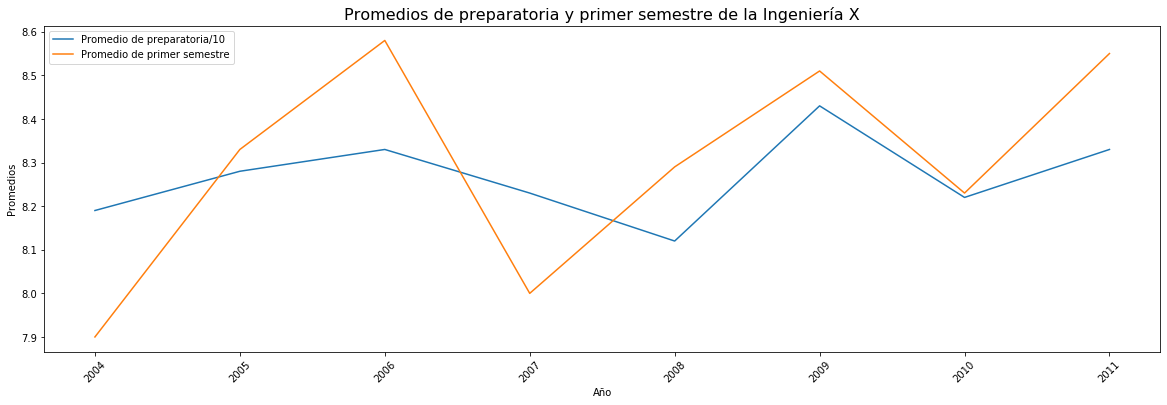

In [60]:
# Graficar medias anuales de promedio de prepa y primer semestre
fig,ax=plt.subplots(figsize=(20,6))
# Graficar la línea de tiempo

plt.plot(aa['media_prom_pre'].div(10).round(2), label='Promedio de preparatoria/10')
plt.plot(aa['media_prom_sem_1'], label='Promedio de primer semestre')

# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Promedios')
# Poner título al diagrama
titulo='Promedios de preparatoria y primer semestre de la Ingeniería X'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

In [69]:
# Calculemos la correlación entre las dos columnas (dos Series)
aa.media_prom_pre.corr(aa.media_prom_sem_1)

0.6655960189786154

Con esta grafica podemos ver que las dos series parecen tener un comportamiento similar, lo que nos hace pendar que estan correlacionadas, después de hacer el análisis de correlación descurbimos que existe una correlación positiva moderada de 0.665. 

# c.9 Analizar series de medianas de promedio de preparatoria/10 (para llevarlo a escala de 10) y promedio de primer semestre.

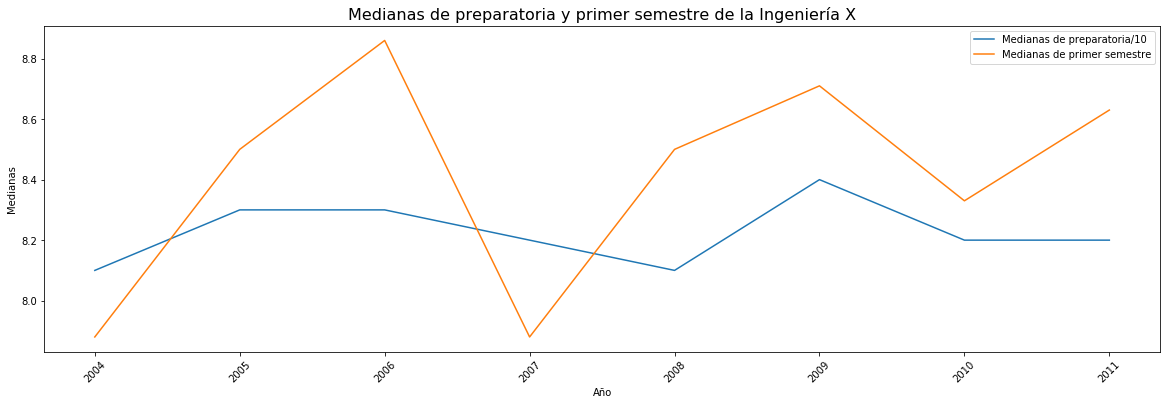

In [61]:
# Graficar medianas anuales de promedio de prepa y primer semestre
fig,ax=plt.subplots(figsize=(20,6))
# Graficar la línea de tiempo

plt.plot(aa['mediana_prom_pre'].div(10).round(2), label='Medianas de preparatoria/10')
plt.plot(aa['mediana_prom_sem_1'], label='Medianas de primer semestre')

# Configurar xticks
plt.xticks(ticks=range(8), labels=range(2004,2012), rotation=45)
# Nombrar eje x
plt.xlabel('Año')
# Nombrar eje y
plt.ylabel('Medianas')
# Poner título al diagrama
titulo='Medianas de preparatoria y primer semestre de la Ingeniería X'
plt.title(titulo,fontsize=16)
ax.legend()
plt.show()

In [70]:
aa.mediana_prom_pre.corr(aa.mediana_prom_sem_1)

0.5988256418081422

Podemos observar en el grafico que al igual que el pasado las series parecen tener un comportamiento similar pero esta parece tener mas diferencia, al realizar la correlación nos damos cuenta que tambien existe una correlación positiva moderada, sin embargo es menor que la de promedios. Sería interesante analizar la correlación de medianas a partir del año 2007 que parece que se comportan de una manera casi igual.

In [71]:
aa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   año                 8 non-null      int64  
 1   tot_alum            8 non-null      int64  
 2   tot_abandono        8 non-null      int64  
 3   tot_aban_1          8 non-null      int64  
 4   tot_aban_2          8 non-null      int64  
 5   tot_aban_3          8 non-null      int64  
 6   tot_aban_4          8 non-null      int64  
 7   tot_aban_5          8 non-null      int64  
 8   tot_aban_6          8 non-null      int64  
 9   tot_aban_7          8 non-null      int64  
 10  tot_aban_8          8 non-null      int64  
 11  tot_aban_9          8 non-null      int64  
 12  tot_aban_10         8 non-null      int64  
 13  tot_aban_11         8 non-null      int64  
 14  tot_aban_12         8 non-null      int64  
 15  PRV                 8 non-null      float64
 16  PRM         